# All improts necessary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
%matplotlib inline

In [126]:
sns.set(font_scale=2)

# A few intro-words

# Read the data

In [3]:
data = pd.read_csv('../data/datasets/TS_Summer_2018/data.csv', sep=';')

In [4]:
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# Add some gaps in the data

Прикинемся, что в данных есть пропуски.

Для этого возьмем все признаки, кроме целевого и закинем туда охапку None-ов:

In [6]:
columns_with_gaps = data.columns[:-1]

In [7]:
columns_with_gaps

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Будем брать процент пропусков в признаке от 0 до 30:

In [8]:
minimum = 0
maximum = 0.3

Слепим словарь, он нам пригодится для того, чтобы бежать по признакам и закидывать туда пропуски:

In [9]:
columns_with_gaps_dict = dict(
    zip(
        columns_with_gaps,
        np.random.uniform(
            minimum,
            maximum,
            len(columns_with_gaps)
        )
    )
)

In [10]:
columns_with_gaps_dict

{'age': 0.16458488617126063,
 'job': 0.07166190840456847,
 'marital': 0.14033772087088878,
 'education': 0.25848540130104963,
 'default': 0.18733653093199118,
 'housing': 0.23775323258128114,
 'loan': 0.035412068972159226,
 'contact': 0.045080818090554926,
 'month': 0.25560752602242354,
 'day_of_week': 0.23390568777114706,
 'duration': 0.06267526505749278,
 'campaign': 0.1937813122782114,
 'pdays': 0.055200960367551566,
 'previous': 0.11472484678554802,
 'poutcome': 0.17019513518783216,
 'emp.var.rate': 0.034065975732952246,
 'cons.price.idx': 0.033573005448164536,
 'cons.conf.idx': 0.27990309525922136,
 'euribor3m': 0.1502892387107613,
 'nr.employed': 0.13543390223719162}

Теперь, чтобы не попортить исходные данные, возьмем их копию и наполним ее пропусками:

In [38]:
data_with_gaps_v1 = data.copy()

In [39]:
for column in columns_with_gaps:
    if columns_with_gaps_dict[column] > 0:
        gaps_count = int(len(data_with_gaps_v1) * columns_with_gaps_dict[column])
        data_with_gaps_v1[column].iloc[
            np.random.randint(
                0,
                len(data_with_gaps_v1),
                gaps_count
            )
        ] = np.nan

In [13]:
data_with_gaps_v1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               34983 non-null float64
job               38347 non-null object
marital           35764 non-null object
education         31747 non-null object
default           34169 non-null object
housing           32462 non-null object
loan              39752 non-null object
contact           39381 non-null object
month             31936 non-null object
day_of_week       32572 non-null object
duration          38699 non-null float64
campaign          33951 non-null float64
pdays             38972 non-null float64
previous          36707 non-null float64
poutcome          34759 non-null object
emp.var.rate      39808 non-null float64
cons.price.idx    39832 non-null float64
cons.conf.idx     31134 non-null float64
euribor3m         35452 non-null float64
nr.employed       35978 non-null float64
y                 41188 non-null object
dtypes: float64(10), object(11)
memory us

# Imputers

Пропуски, понятное дело, вещь вполне ожидаемая.

Если в вашей задаче нет пропусков, то возможно, что вам это снится или вы работаете над задачей из параллельного мира, где нет страданий и все счастливы.

Впрочем, если вы все-таки в реальном мире, то (в том или ином виде) вам нужно будет обрабатывать пропуски в данных.

На вскидку можно перечислить несколько вариантов:
- выкинуть те строки\столбцы, где встречаются пропуски;
- заполнить пропуски какими-нибудь значениями по умолчанию (например 0 или -1 для вещественных признаков или "unknown" для категориальных);
- заполнить пропуски статистиками;
- попробовать выделить подпространство без пропусков, посчитать [K-мерное дерево](http://scikit-learn.org/0.19/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) и по нему уже брать ТОП-(сколько-нибудь) ближайших объектов и уже на них либо считать статистику (среднее или медиана для вещественных, мода - для категориальных);
- и т.д.

К слову сказать, по этому поводу написана целая [книга](http://books.sernam.ru/book_stan.php).

Мы здесь подробно на этой теме останавливаться не будем.

Рассмотрим лишь несколько самых простых подходов, которые могут встретиться вам на практике.

## sklearn.impute.SimpleImputer

Здесь мы заюзаем довольно простой в обращении класс, который предоставляет несколько опций, а именно:
- заполнить пропуски средними значениями;
- заполнить пропуски медианами;
- заполнить пропуски модами;
- заполнить пропуски константами.

Но сначала вспомним из EDA.ipynb, что в данных признаки, в целом, двух типов: вещественные и категориальные. Применим разные стратегии к разным подмножествам признаков:

In [14]:
numerical_features = [
    'age',
    'campaign',
    'cons.conf.idx',
    'cons.price.idx',
    'duration',
    'emp.var.rate',
    'euribor3m',
    'nr.employed',
    'pdays',
    'previous'
]

In [15]:
categorial_features = [
    'contact',
    'day_of_week',
    'default',
    'education',
    'housing',
    'job',
    'loan',
    'marital',
    'month',
    'poutcome'
]

In [45]:
mean_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=True
)

In [46]:
median_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='median',
    verbose=True
)

In [47]:
most_frequent_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='most_frequent',
    verbose=True
)

In [48]:
constant_imputer = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value='unknown',
    verbose=True
)

In [49]:
numericals_with_mean_imputed = pd.DataFrame(
    mean_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [55]:
numericals_with_mean_imputed.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.027191,2.564852,-40.491804,93.575731,258.218432,0.084365,3.624525,5166.855898,962.363165,0.172286
std,9.594602,2.510086,4.044590,0.568893,251.977796,1.544150,1.606681,67.613976,182.084614,0.466315
min,17.000000,1.000000,-50.800000,92.201000,0.000000,-3.400000,0.634000,4963.600000,0.000000,0.000000
25%,33.000000,1.000000,-42.700000,93.075000,107.000000,-1.800000,1.405000,5099.100000,999.000000,0.000000
50%,40.027191,2.000000,-40.491804,93.575731,192.000000,1.100000,4.855000,5191.000000,999.000000,0.000000
75%,45.000000,3.000000,-36.400000,93.994000,305.000000,1.400000,4.960000,5228.100000,999.000000,0.000000
max,98.000000,56.000000,-26.900000,94.767000,4918.000000,1.400000,5.045000,5228.100000,999.000000,7.000000


In [54]:
numericals_with_mean_imputed.head()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
0,56.000000,1.000000,-36.400000,93.994,261.0,1.1,3.624525,5191.000000,999.0,0.0
1,40.027191,2.564852,-36.400000,93.994,149.0,1.1,4.857000,5166.855898,999.0,0.0
2,37.000000,1.000000,-36.400000,93.994,226.0,1.1,4.857000,5191.000000,999.0,0.0
3,40.027191,1.000000,-40.491804,93.994,151.0,1.1,3.624525,5191.000000,999.0,0.0
4,56.000000,2.564852,-36.400000,93.994,307.0,1.1,4.857000,5191.000000,999.0,0.0


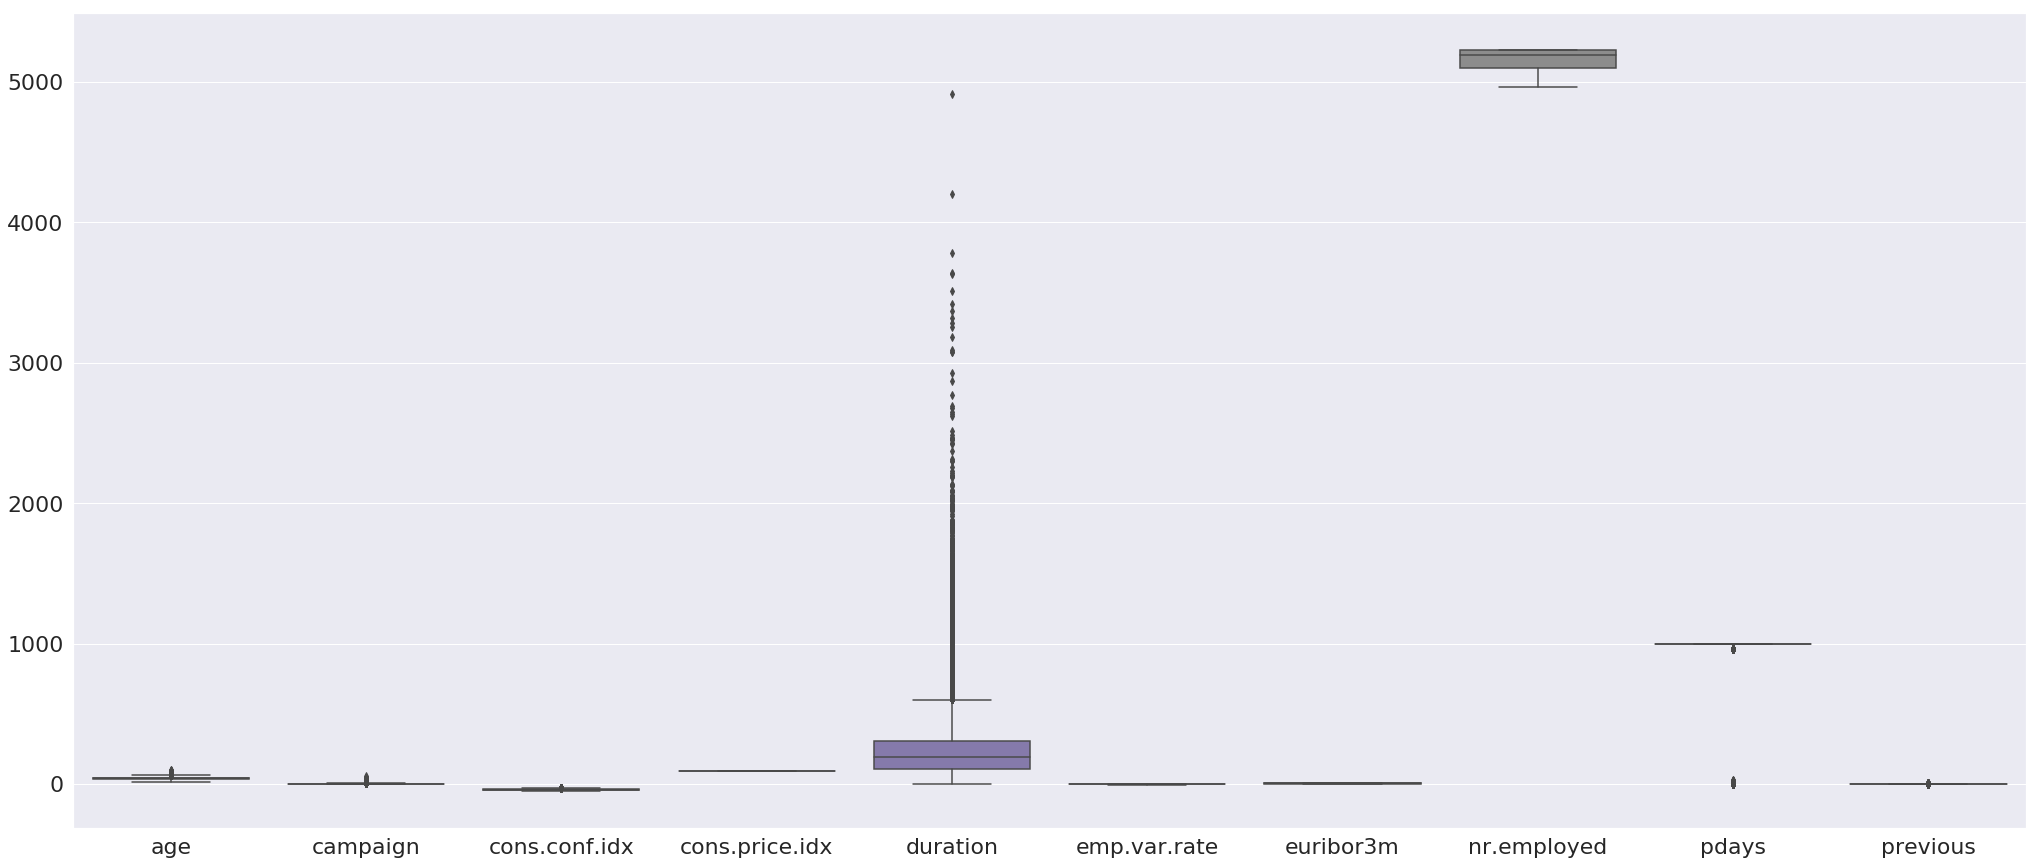

In [129]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed)
plt.show()

In [50]:
numericals_with_median_imputed = pd.DataFrame(
    median_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [58]:
numericals_with_median_imputed.describe().append(data_with_gaps_v1[numerical_features].median().rename("median"))

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.719579,2.465330,-40.810246,93.581452,253.482179,0.118369,3.797451,5169.911134,964.332524,0.153588
std,9.622129,2.519294,4.083368,0.569735,252.667466,1.554921,1.662725,68.088786,182.271997,0.469385
min,17.000000,1.000000,-50.800000,92.201000,0.000000,-3.400000,0.634000,4963.600000,0.000000,0.000000
25%,33.000000,1.000000,-42.700000,93.075000,107.000000,-1.800000,1.405000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,-41.800000,93.749000,180.000000,1.100000,4.857000,5191.000000,999.000000,0.000000
75%,45.000000,3.000000,-36.400000,93.994000,305.000000,1.400000,4.960000,5228.100000,999.000000,0.000000
max,98.000000,56.000000,-26.900000,94.767000,4918.000000,1.400000,5.045000,5228.100000,999.000000,7.000000
median,38.000000,2.000000,-41.800000,93.749000,180.000000,1.100000,4.857000,5191.000000,999.000000,0.000000


In [59]:
numericals_with_median_imputed.head()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
0,56.0,1.0,-36.4,93.994,261.0,1.1,4.857,5191.0,999.0,0.0
1,38.0,2.0,-36.4,93.994,149.0,1.1,4.857,5191.0,999.0,0.0
2,37.0,1.0,-36.4,93.994,226.0,1.1,4.857,5191.0,999.0,0.0
3,38.0,1.0,-41.8,93.994,151.0,1.1,4.857,5191.0,999.0,0.0
4,56.0,2.0,-36.4,93.994,307.0,1.1,4.857,5191.0,999.0,0.0


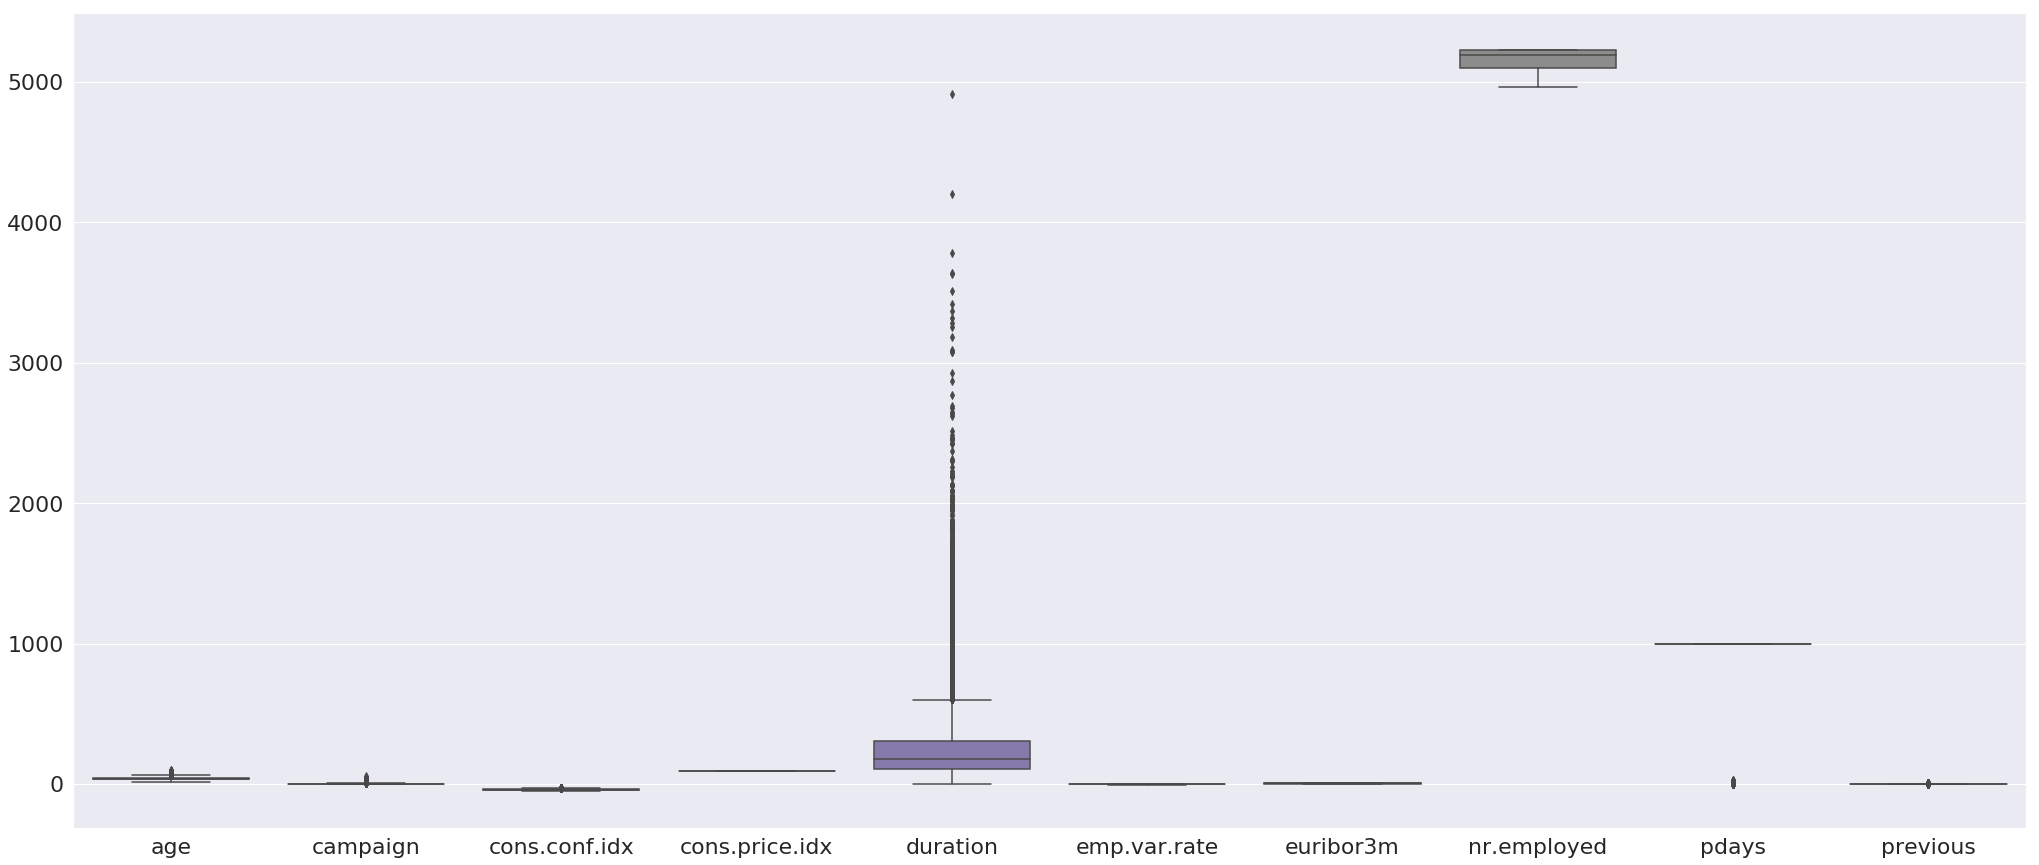

In [130]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed)
plt.show()

In [51]:
numericals_with_most_frequent_imputed = pd.DataFrame(
    most_frequent_imputer.fit_transform(data_with_gaps_v1[numerical_features]),
    columns=numerical_features
)

In [68]:
numericals_with_most_frequent_imputed.describe().append(data_with_gaps_v1[numerical_features].mode().loc[0].rename("most_frequent"))

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,38.657376,2.289138,-39.495775,93.589542,247.729776,0.128414,3.797451,5174.605832,964.332524,0.153588
std,10.126491,2.579918,4.409338,0.573781,255.342256,1.562181,1.662725,70.613285,182.271997,0.469385
min,17.000000,1.000000,-50.800000,92.201000,0.000000,-3.400000,0.634000,4963.600000,0.000000,0.000000
25%,31.000000,1.000000,-42.700000,93.075000,89.000000,-1.800000,1.405000,5099.100000,999.000000,0.000000
50%,36.000000,1.000000,-36.400000,93.918000,168.000000,1.100000,4.857000,5195.800000,999.000000,0.000000
75%,45.000000,3.000000,-36.400000,93.994000,305.000000,1.400000,4.960000,5228.100000,999.000000,0.000000
max,98.000000,56.000000,-26.900000,94.767000,4918.000000,1.400000,5.045000,5228.100000,999.000000,7.000000
most_frequent,31.000000,1.000000,-36.400000,93.994000,85.000000,1.400000,4.857000,5228.100000,999.000000,0.000000


In [66]:
numericals_with_most_frequent_imputed.head()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
0,56.0,1.0,-36.4,93.994,261.0,1.1,4.857,5191.0,999.0,0.0
1,31.0,1.0,-36.4,93.994,149.0,1.1,4.857,5228.1,999.0,0.0
2,37.0,1.0,-36.4,93.994,226.0,1.1,4.857,5191.0,999.0,0.0
3,31.0,1.0,-36.4,93.994,151.0,1.1,4.857,5191.0,999.0,0.0
4,56.0,1.0,-36.4,93.994,307.0,1.1,4.857,5191.0,999.0,0.0


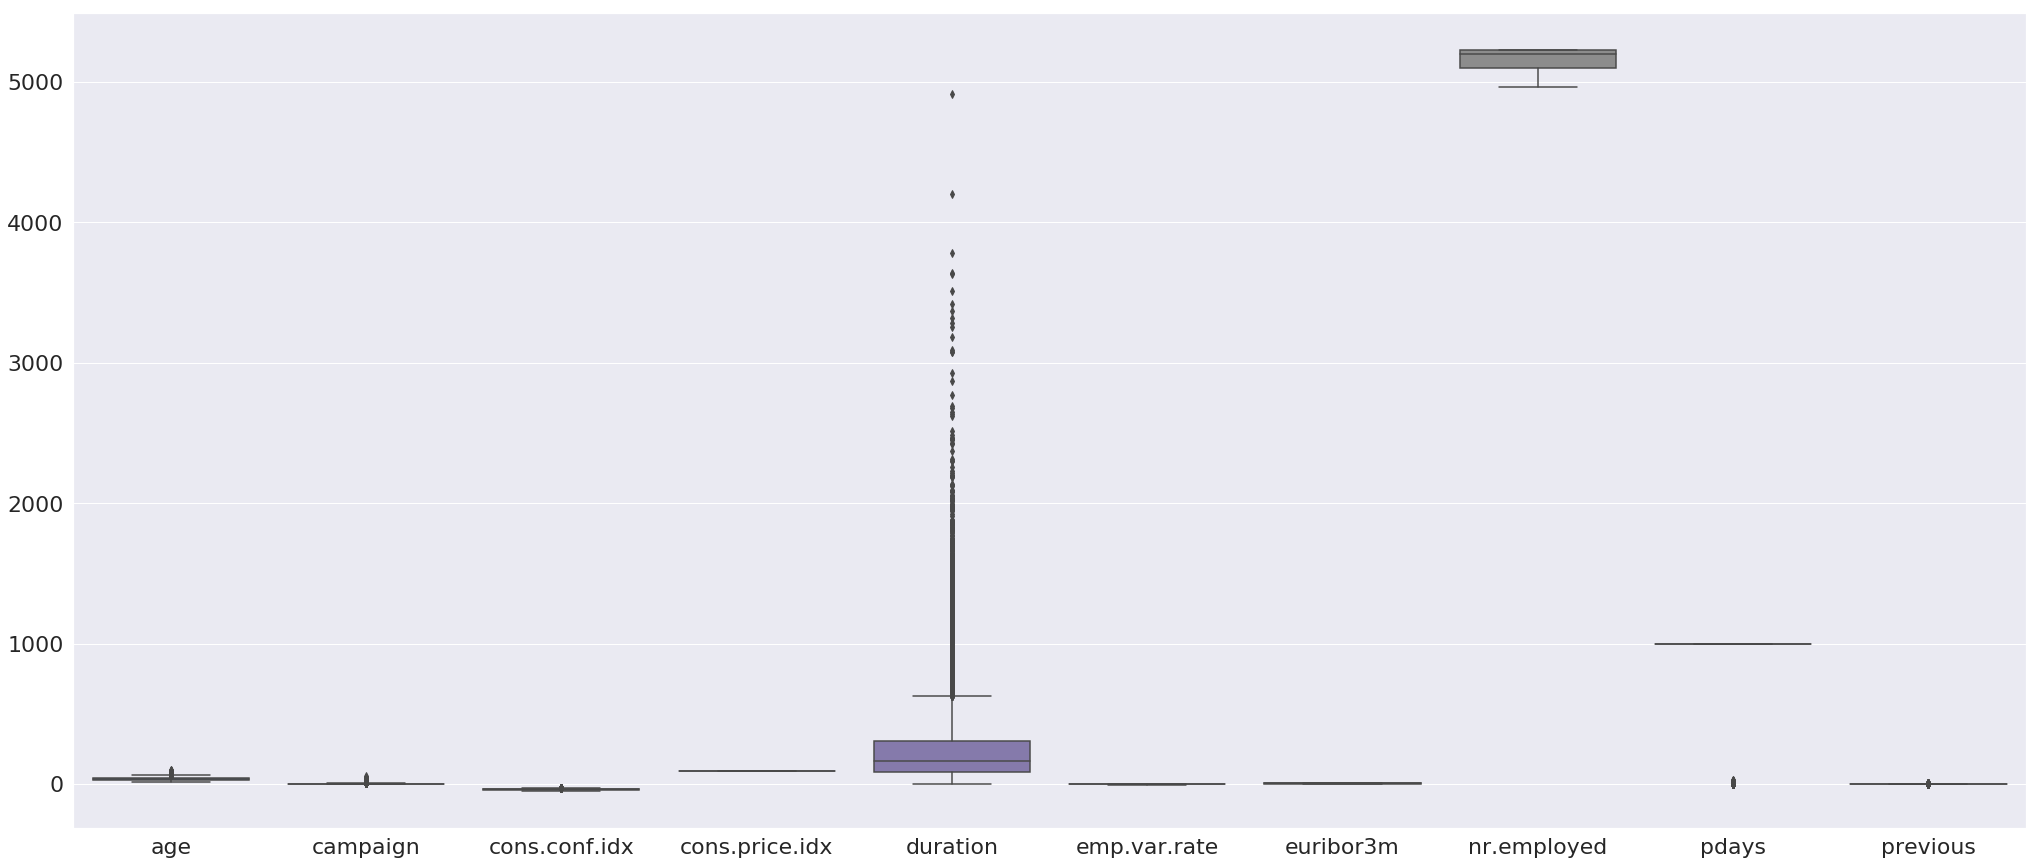

In [131]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed)
plt.show()

In [52]:
categorials_with_constant_imputed = pd.DataFrame(
    constant_imputer.fit_transform(data_with_gaps_v1[categorial_features]),
    columns=categorial_features
)

In [69]:
categorials_with_constant_imputed[categorial_features[0]].value_counts()

cellular     24998
telephone    14371
unknown       1819
Name: contact, dtype: int64

In [70]:
categorials_with_constant_imputed[categorial_features[2]].value_counts()

no         26983
unknown    14202
yes            3
Name: default, dtype: int64

In [71]:
categorials_with_constant_imputed[categorial_features[2]].value_counts()

no         26983
unknown    14202
yes            3
Name: default, dtype: int64

In [53]:
categorials_with_constant_imputed.head()

,contact,day_of_week,default,education,housing,job,loan,marital,month,poutcome
0,telephone,mon,no,basic.4y,no,unknown,no,married,unknown,nonexistent
1,telephone,mon,unknown,high.school,unknown,services,no,married,unknown,nonexistent
2,telephone,unknown,no,high.school,yes,services,no,married,may,nonexistent
3,telephone,unknown,no,unknown,unknown,admin.,no,married,unknown,nonexistent
4,telephone,mon,no,high.school,no,services,yes,married,may,nonexistent


# Scalers

## sklearn.preprocessing.MaxAbsScaler

In [94]:
max_abs_scaler = MaxAbsScaler()

In [95]:
numericals_with_mean_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [110]:
numericals_with_mean_imputed_max_abs_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.408441,0.045801,-0.797083,0.987429,0.052505,0.024813,0.718439,0.988286,0.963326,0.024612
std,0.097904,0.044823,0.079618,0.006003,0.051236,0.454162,0.318470,0.012933,0.182267,0.066616
min,0.173469,0.017857,-1.000000,0.972923,0.000000,-1.000000,0.125669,0.949408,0.000000,0.000000
25%,0.336735,0.017857,-0.840551,0.982146,0.021757,-0.529412,0.278494,0.975326,1.000000,0.000000
50%,0.408441,0.035714,-0.797083,0.987429,0.039040,0.323529,0.962339,0.992904,1.000000,0.000000
75%,0.459184,0.053571,-0.716535,0.991843,0.062017,0.411765,0.983152,1.000000,1.000000,0.000000
max,1.000000,1.000000,-0.529528,1.000000,1.000000,0.411765,1.000000,1.000000,1.000000,1.000000


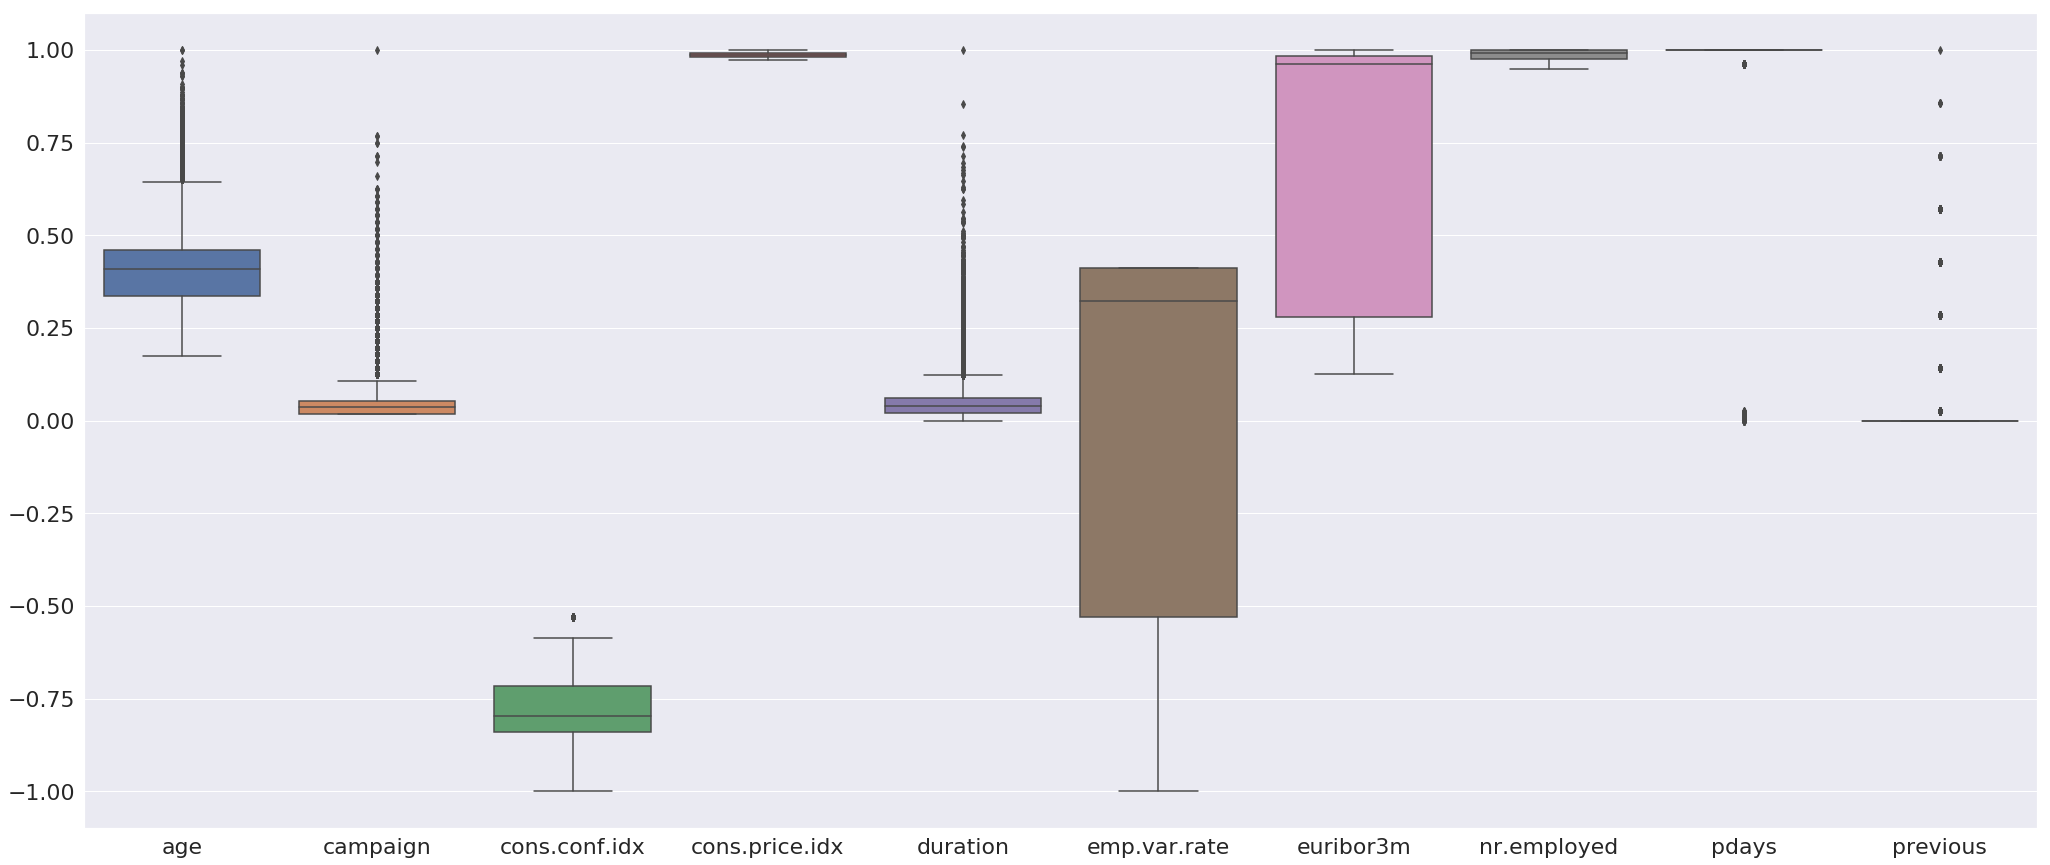

In [151]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_max_abs_scaled)
plt.show()

In [96]:
numericals_with_median_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [111]:
numericals_with_median_imputed_max_abs_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.405302,0.044024,-0.803351,0.987490,0.051542,0.034815,0.752716,0.988870,0.965298,0.021941
std,0.098185,0.044987,0.080381,0.006012,0.051376,0.457330,0.329579,0.013024,0.182454,0.067055
min,0.173469,0.017857,-1.000000,0.972923,0.000000,-1.000000,0.125669,0.949408,0.000000,0.000000
25%,0.336735,0.017857,-0.840551,0.982146,0.021757,-0.529412,0.278494,0.975326,1.000000,0.000000
50%,0.387755,0.035714,-0.822835,0.989258,0.036600,0.323529,0.962735,0.992904,1.000000,0.000000
75%,0.459184,0.053571,-0.716535,0.991843,0.062017,0.411765,0.983152,1.000000,1.000000,0.000000
max,1.000000,1.000000,-0.529528,1.000000,1.000000,0.411765,1.000000,1.000000,1.000000,1.000000


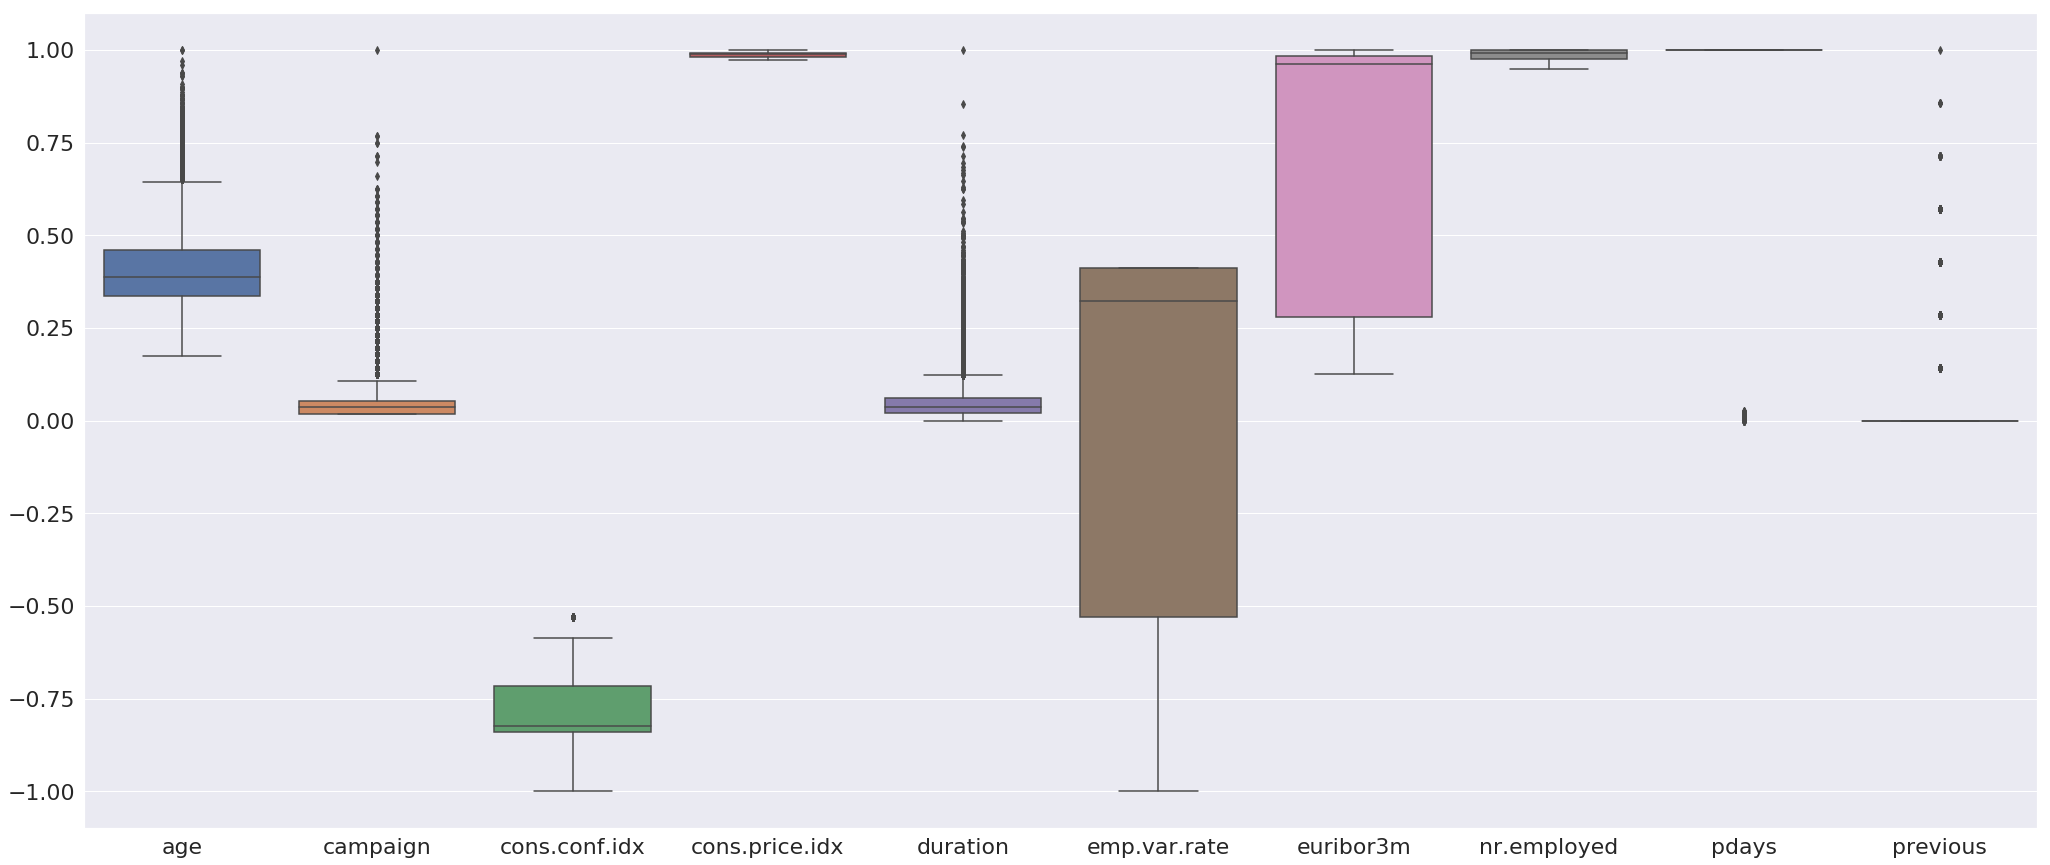

In [152]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_max_abs_scaled)
plt.show()

In [97]:
numericals_with_most_frequent_imputed_max_abs_scaled = pd.DataFrame(
    max_abs_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [112]:
numericals_with_most_frequent_imputed_max_abs_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.394463,0.040877,-0.777476,0.987575,0.050372,0.037769,0.752716,0.989768,0.965298,0.021941
std,0.103332,0.046070,0.086798,0.006055,0.051920,0.459465,0.329579,0.013506,0.182454,0.067055
min,0.173469,0.017857,-1.000000,0.972923,0.000000,-1.000000,0.125669,0.949408,0.000000,0.000000
25%,0.316327,0.017857,-0.840551,0.982146,0.018097,-0.529412,0.278494,0.975326,1.000000,0.000000
50%,0.367347,0.017857,-0.716535,0.991041,0.034160,0.323529,0.962735,0.993822,1.000000,0.000000
75%,0.459184,0.053571,-0.716535,0.991843,0.062017,0.411765,0.983152,1.000000,1.000000,0.000000
max,1.000000,1.000000,-0.529528,1.000000,1.000000,0.411765,1.000000,1.000000,1.000000,1.000000


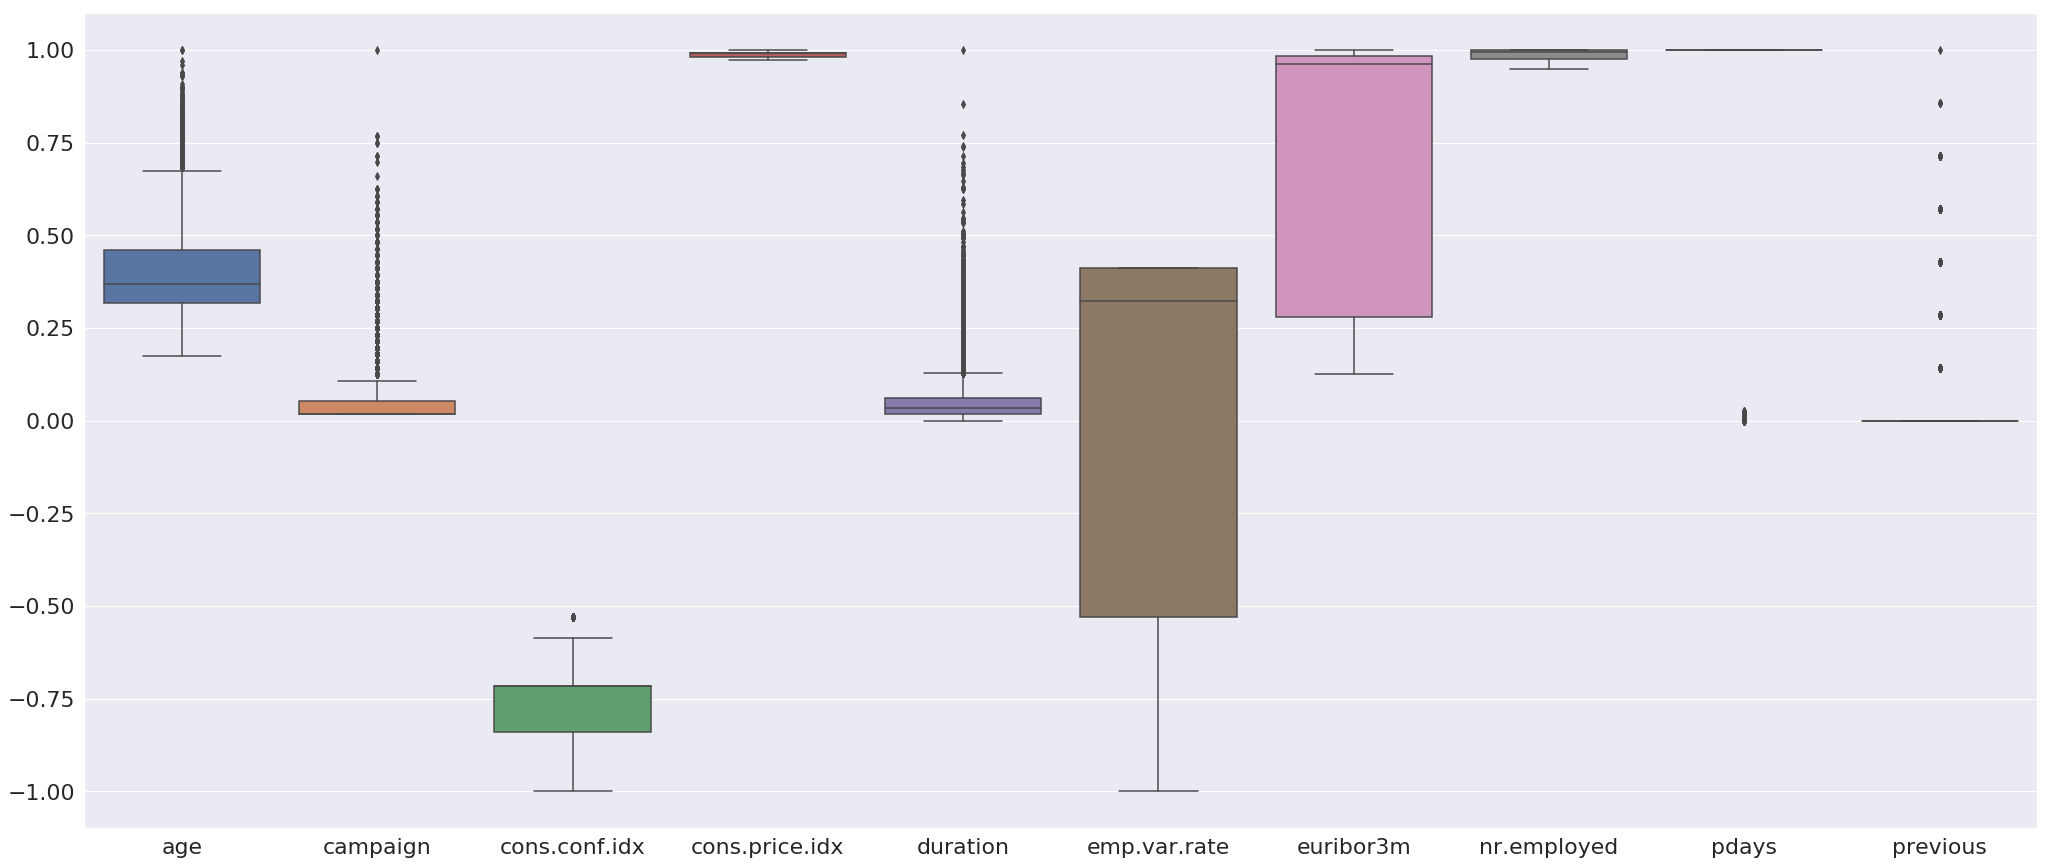

In [153]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_max_abs_scaled)
plt.show()

## sklearn.preprocessing.MinMaxScaler

In [98]:
min_max_scaler = MinMaxScaler()

In [99]:
numericals_with_mean_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [113]:
numericals_with_mean_imputed_min_max_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.284286,0.028452,0.431305,0.535749,0.052505,0.725909,0.677970,0.768453,0.963326,0.024612
std,0.118452,0.045638,0.169230,0.221704,0.051236,0.321698,0.364244,0.255629,0.182267,0.066616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197531,0.000000,0.338912,0.340608,0.021757,0.333333,0.174790,0.512287,1.000000,0.000000
50%,0.284286,0.018182,0.431305,0.535749,0.039040,0.937500,0.956926,0.859735,1.000000,0.000000
75%,0.345679,0.036364,0.602510,0.698753,0.062017,1.000000,0.980730,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


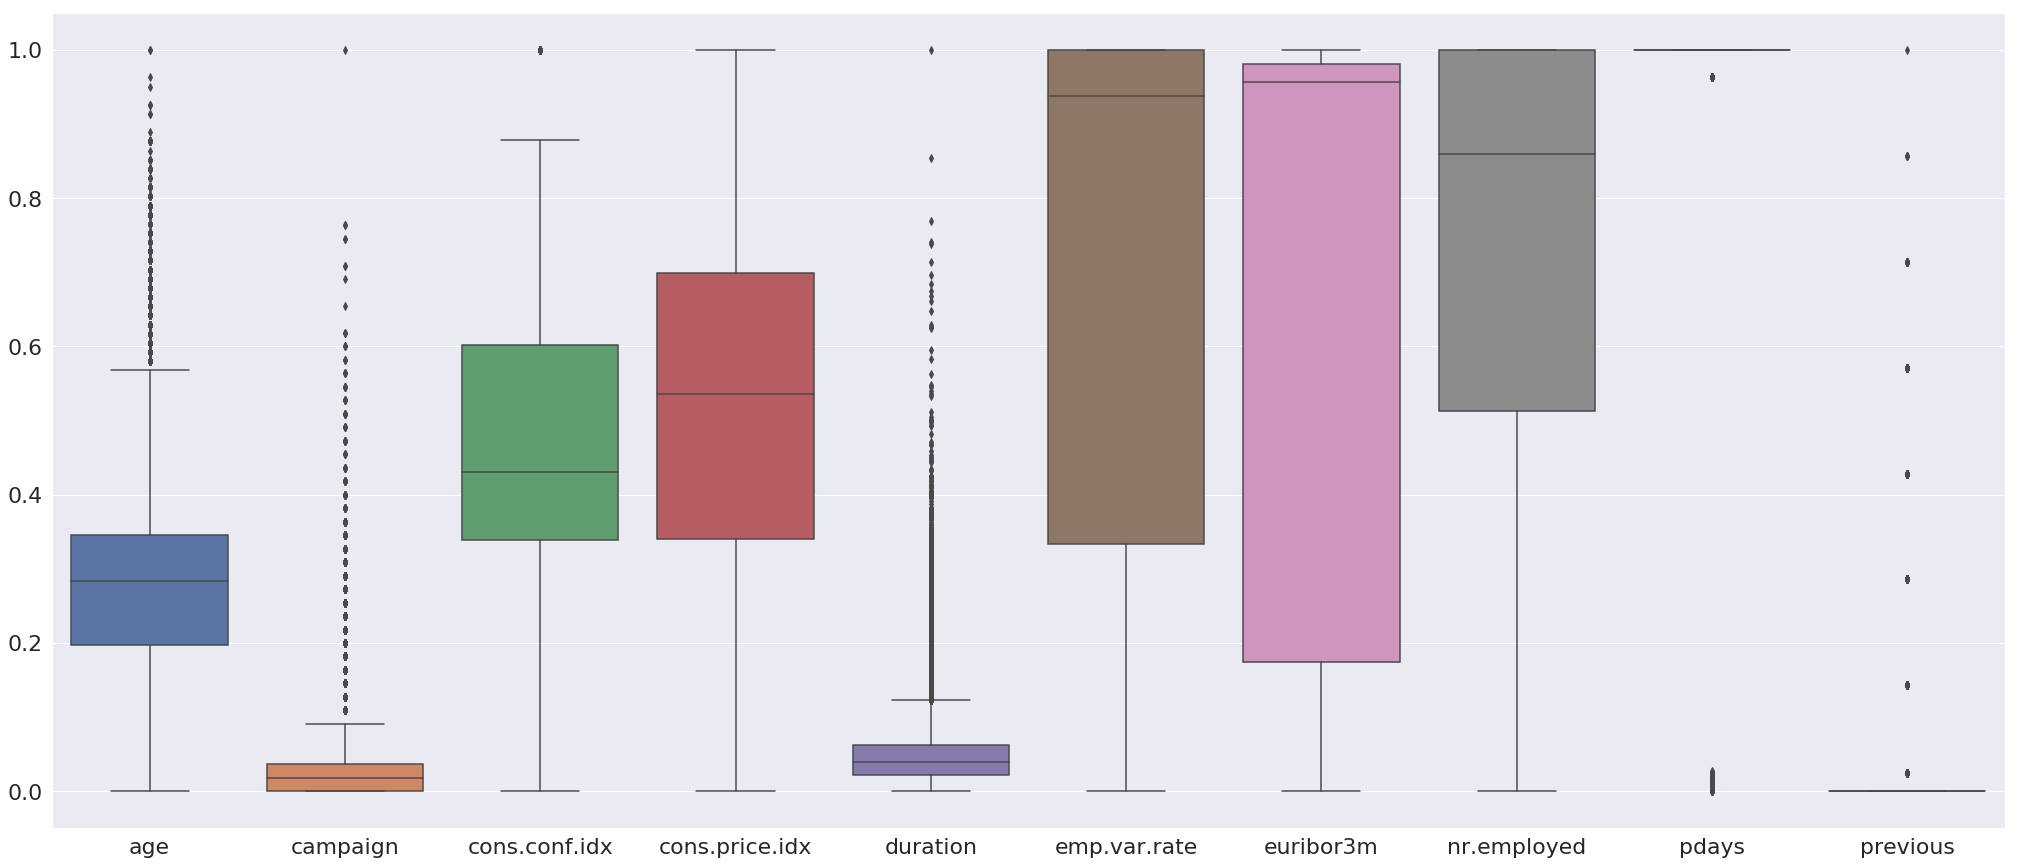

In [154]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_min_max_scaled)
plt.show()

In [100]:
numericals_with_median_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [114]:
numericals_with_median_imputed_min_max_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.280489,0.026642,0.417981,0.537978,0.051542,0.732994,0.717173,0.780004,0.965298,0.021941
std,0.118792,0.045805,0.170852,0.222032,0.051376,0.323942,0.376950,0.257425,0.182454,0.067055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197531,0.000000,0.338912,0.340608,0.021757,0.333333,0.174790,0.512287,1.000000,0.000000
50%,0.259259,0.018182,0.376569,0.603274,0.036600,0.937500,0.957379,0.859735,1.000000,0.000000
75%,0.345679,0.036364,0.602510,0.698753,0.062017,1.000000,0.980730,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


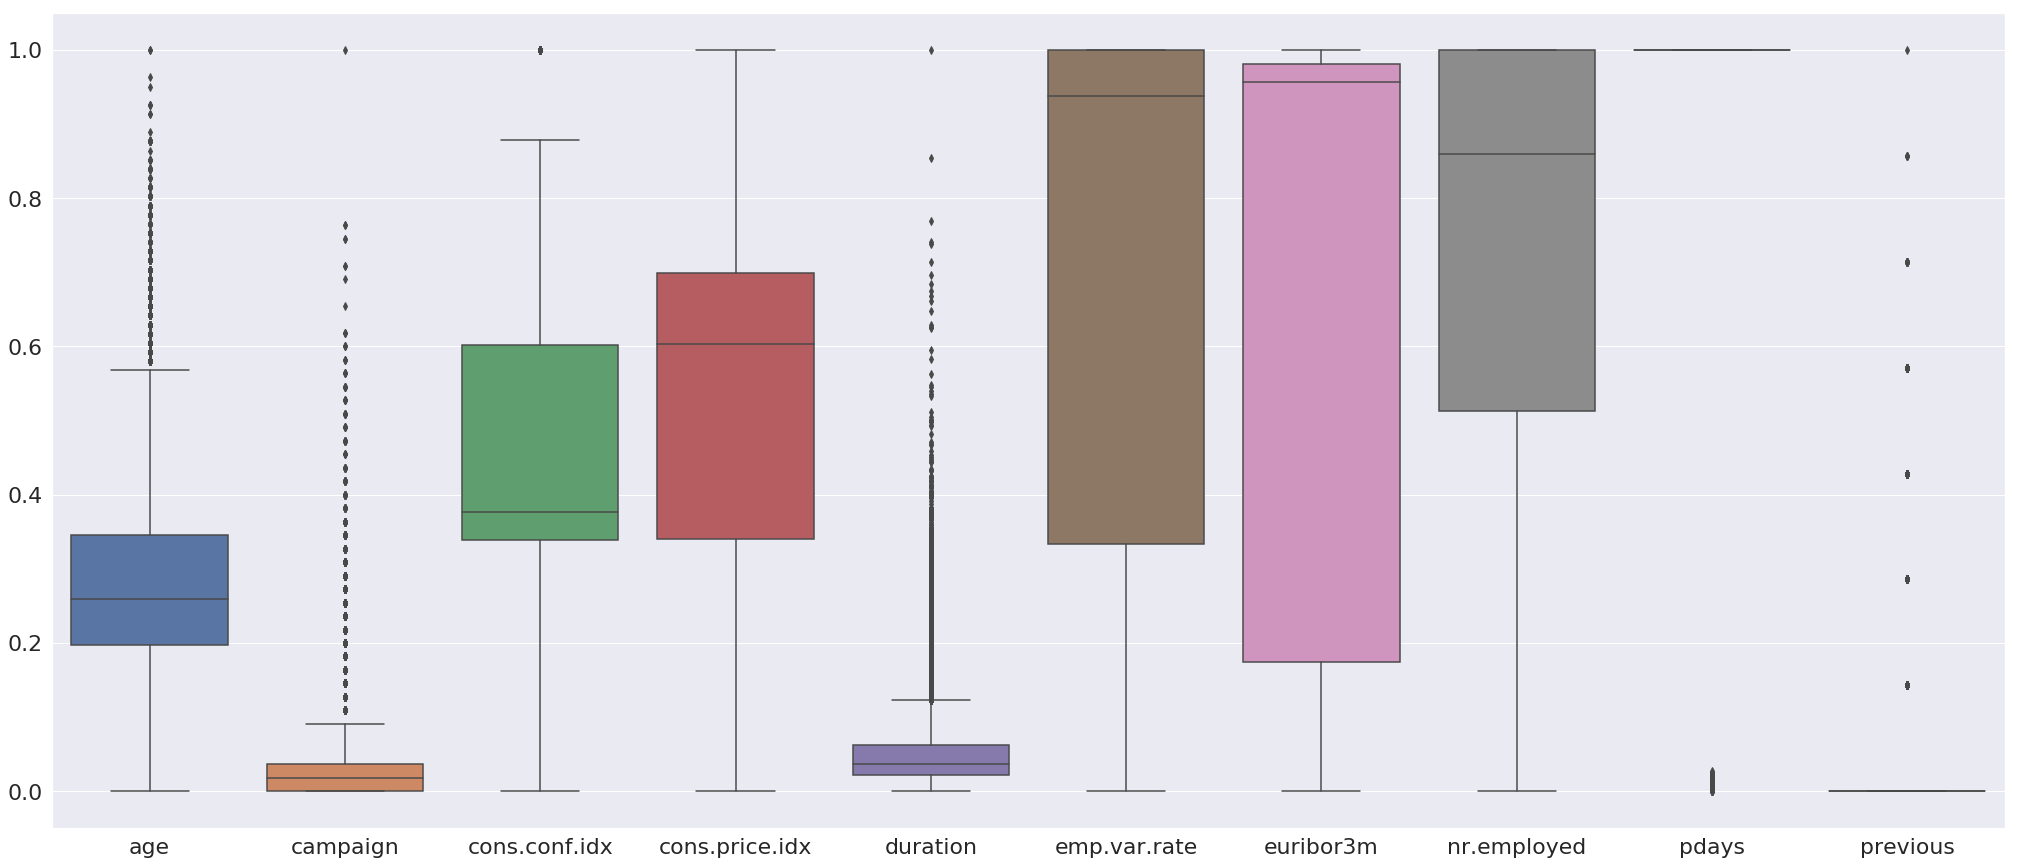

In [155]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_min_max_scaled)
plt.show()

In [101]:
numericals_with_most_frequent_imputed_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [115]:
numericals_with_most_frequent_imputed_min_max_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.267375,0.023439,0.472980,0.541131,0.050372,0.735086,0.717173,0.797754,0.965298,0.021941
std,0.125018,0.046908,0.184491,0.223609,0.051920,0.325454,0.376950,0.266969,0.182454,0.067055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172840,0.000000,0.338912,0.340608,0.018097,0.333333,0.174790,0.512287,1.000000,0.000000
50%,0.234568,0.000000,0.602510,0.669135,0.034160,0.937500,0.957379,0.877883,1.000000,0.000000
75%,0.345679,0.036364,0.602510,0.698753,0.062017,1.000000,0.980730,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


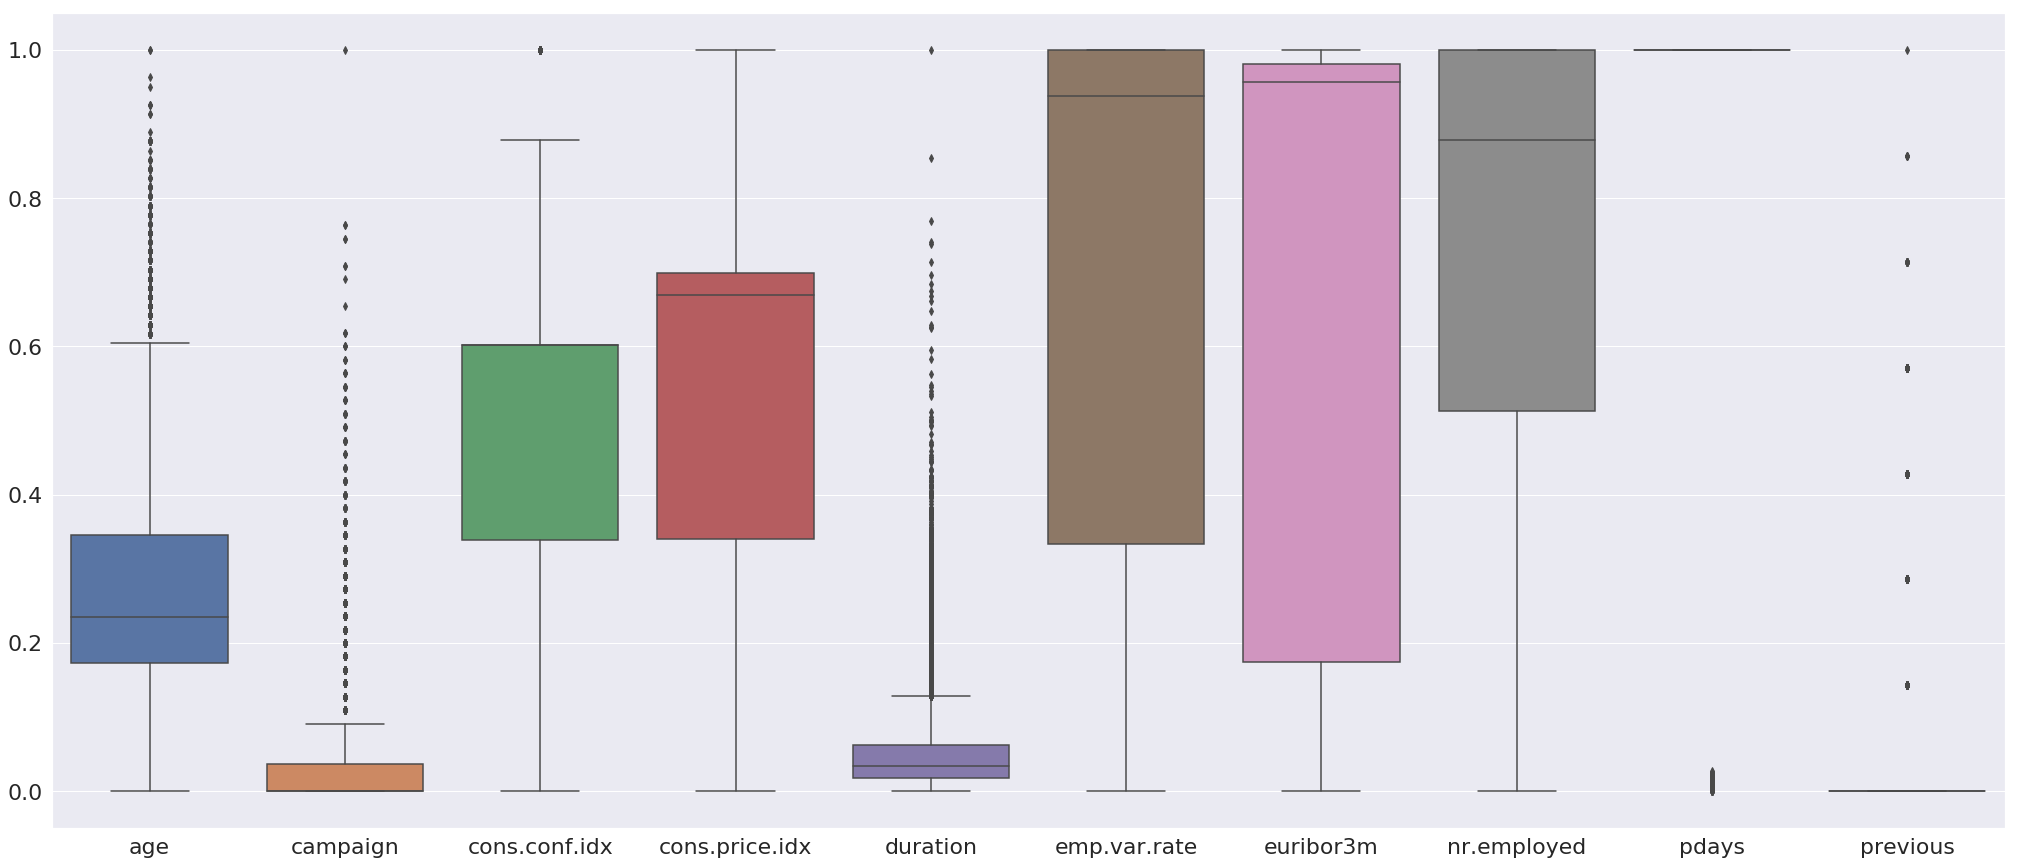

In [156]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_min_max_scaled)
plt.show()

## sklearn.preprocessing.RobustScaler

In [102]:
robust_scaler = RobustScaler()

In [103]:
numericals_with_mean_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [116]:
numericals_with_mean_imputed_robust_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,4.118800e+04,41188.000000,4.118800e+04,4.118800e+04,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-9.417434e-16,0.282426,4.708458e-15,4.923659e-14,0.334437,-0.317386,-0.346125,-0.187164,-36.636835,0.172286
std,7.995501e-01,1.255043,6.419984e-01,6.190344e-01,1.272615,0.482547,0.451950,0.524139,182.084614,0.466315
min,-1.918933e+00,-0.500000,-1.636222e+00,-1.495899e+00,-0.969697,-1.406250,-1.187342,-1.762791,-999.000000,0.000000
25%,-5.855993e-01,-0.500000,-3.505073e-01,-5.448653e-01,-0.429293,-0.906250,-0.970464,-0.712403,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.144007e-01,0.500000,6.494927e-01,4.551347e-01,0.570707,0.093750,0.029536,0.287597,0.000000,0.000000
max,4.831067e+00,27.000000,2.157429e+00,1.296266e+00,23.868687,0.093750,0.053446,0.287597,0.000000,7.000000


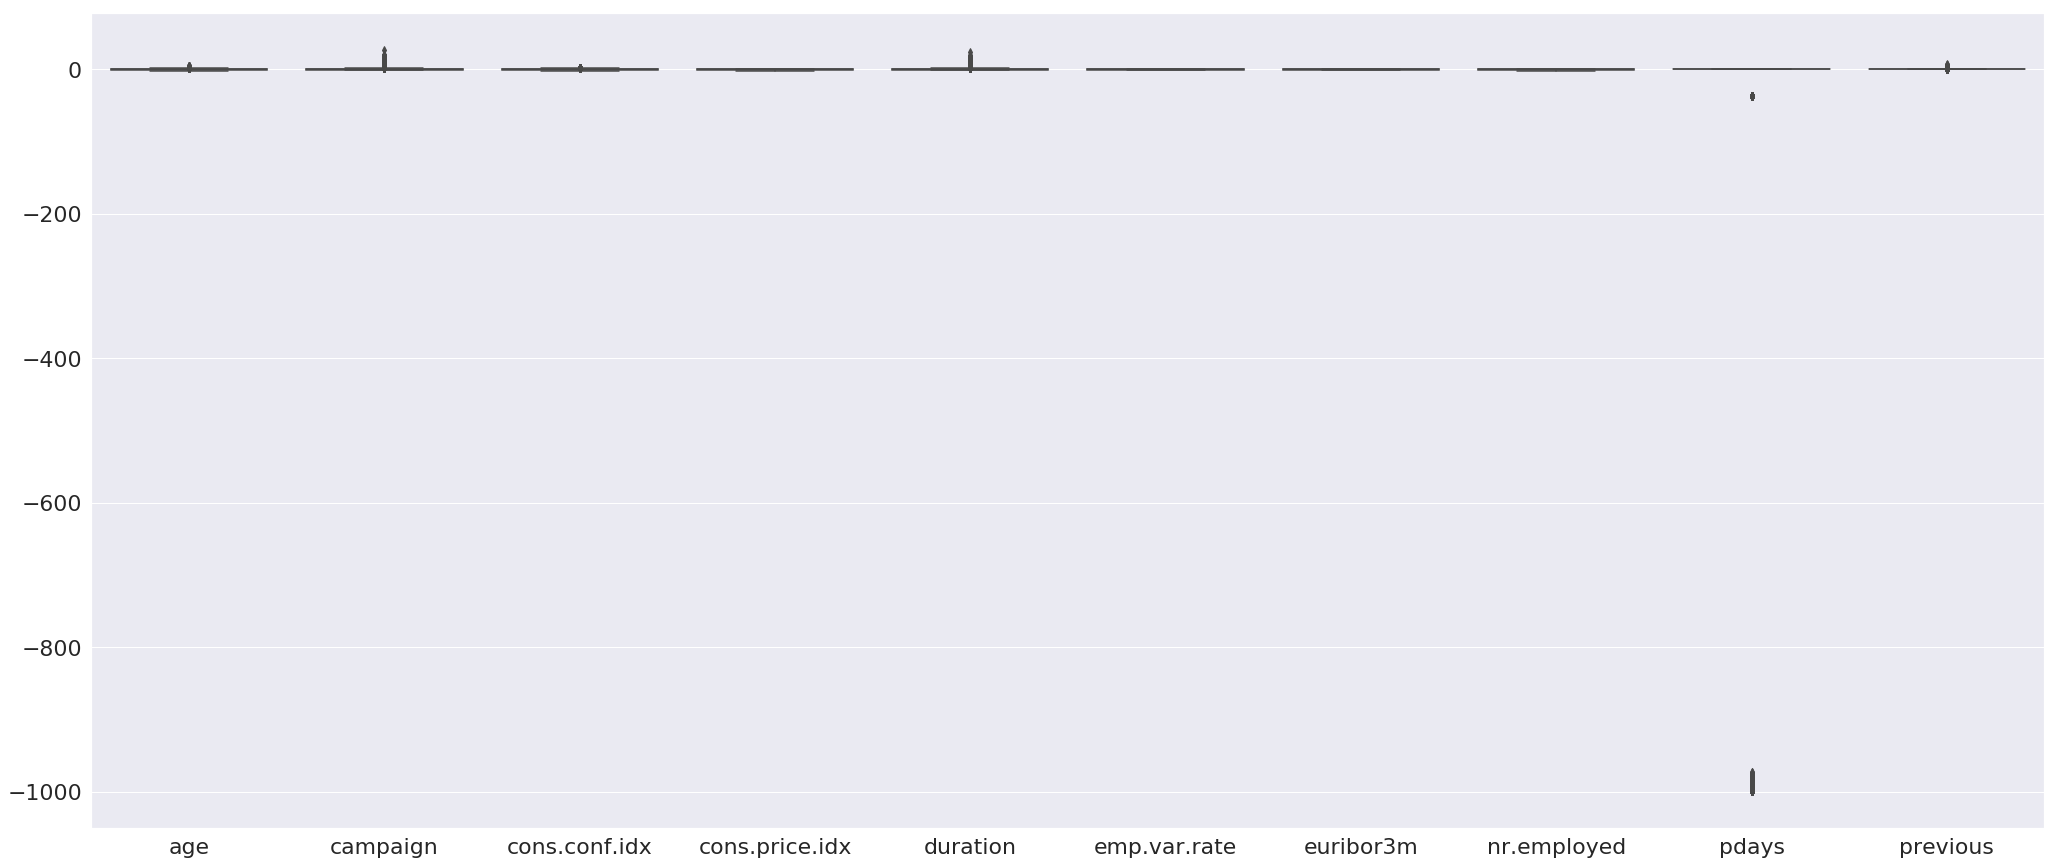

In [157]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_robust_scaled)
plt.show()

In [104]:
numericals_with_median_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [117]:
numericals_with_median_imputed_robust_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.143298,0.232665,0.157104,-0.182315,0.371122,-0.306760,-0.298045,-0.163480,-34.667476,0.153588
std,0.801844,1.259647,0.648154,0.619951,1.276098,0.485913,0.467714,0.527820,182.271997,0.469385
min,-1.750000,-0.500000,-1.428571,-1.684440,-0.909091,-1.406250,-1.187904,-1.762791,-999.000000,0.000000
25%,-0.416667,-0.500000,-0.142857,-0.733406,-0.368687,-0.906250,-0.971027,-0.712403,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.583333,0.500000,0.857143,0.266594,0.631313,0.093750,0.028973,0.287597,0.000000,0.000000
max,5.000000,27.000000,2.365079,1.107726,23.929293,0.093750,0.052883,0.287597,0.000000,7.000000


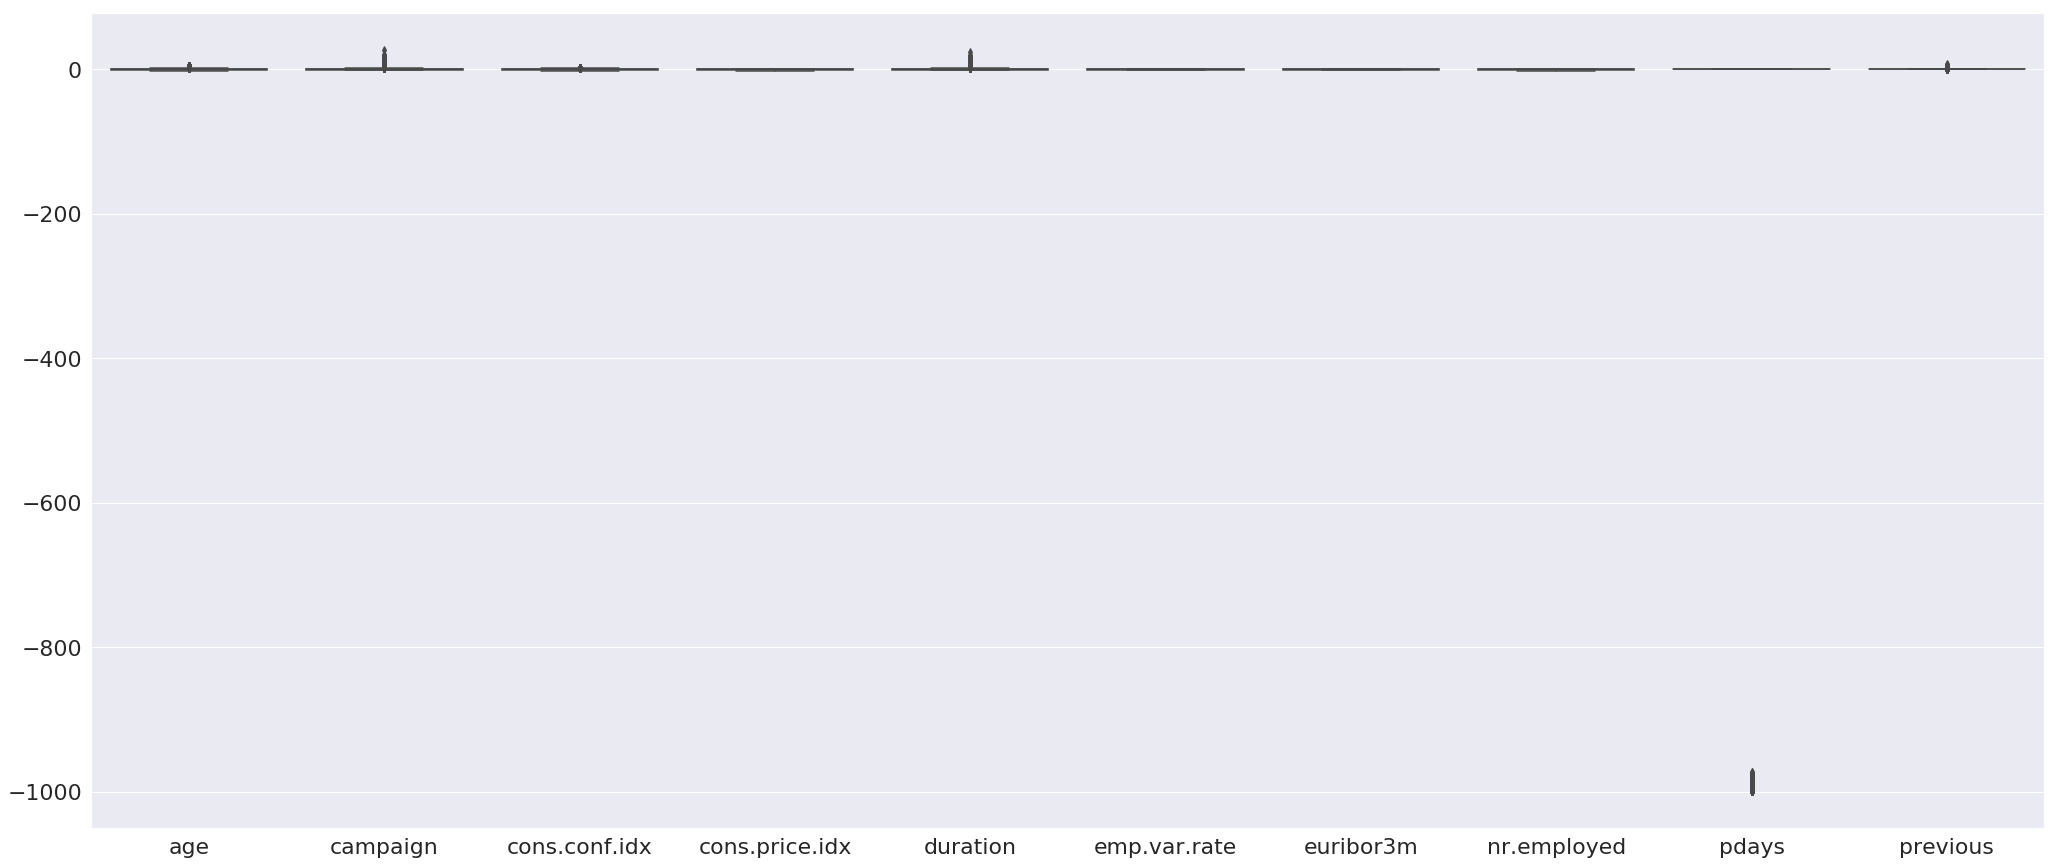

In [158]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_robust_scaled)
plt.show()

In [105]:
numericals_with_most_frequent_imputed_robust_scaled = pd.DataFrame(
    robust_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [118]:
numericals_with_most_frequent_imputed_robust_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.189813,0.644569,-0.491393,-0.357408,0.369119,-0.303621,-0.298045,-0.164296,-34.667476,0.153588
std,0.723321,1.289959,0.699895,0.624354,1.182140,0.488182,0.467714,0.547390,182.271997,0.469385
min,-1.357143,0.000000,-2.285714,-1.868335,-0.777778,-1.406250,-1.187904,-1.800000,-999.000000,0.000000
25%,-0.357143,0.000000,-1.000000,-0.917301,-0.365741,-0.906250,-0.971027,-0.749612,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.642857,1.000000,0.000000,0.082699,0.634259,0.093750,0.028973,0.250388,0.000000,0.000000
max,4.428571,27.500000,1.507937,0.923830,21.990741,0.093750,0.052883,0.250388,0.000000,7.000000


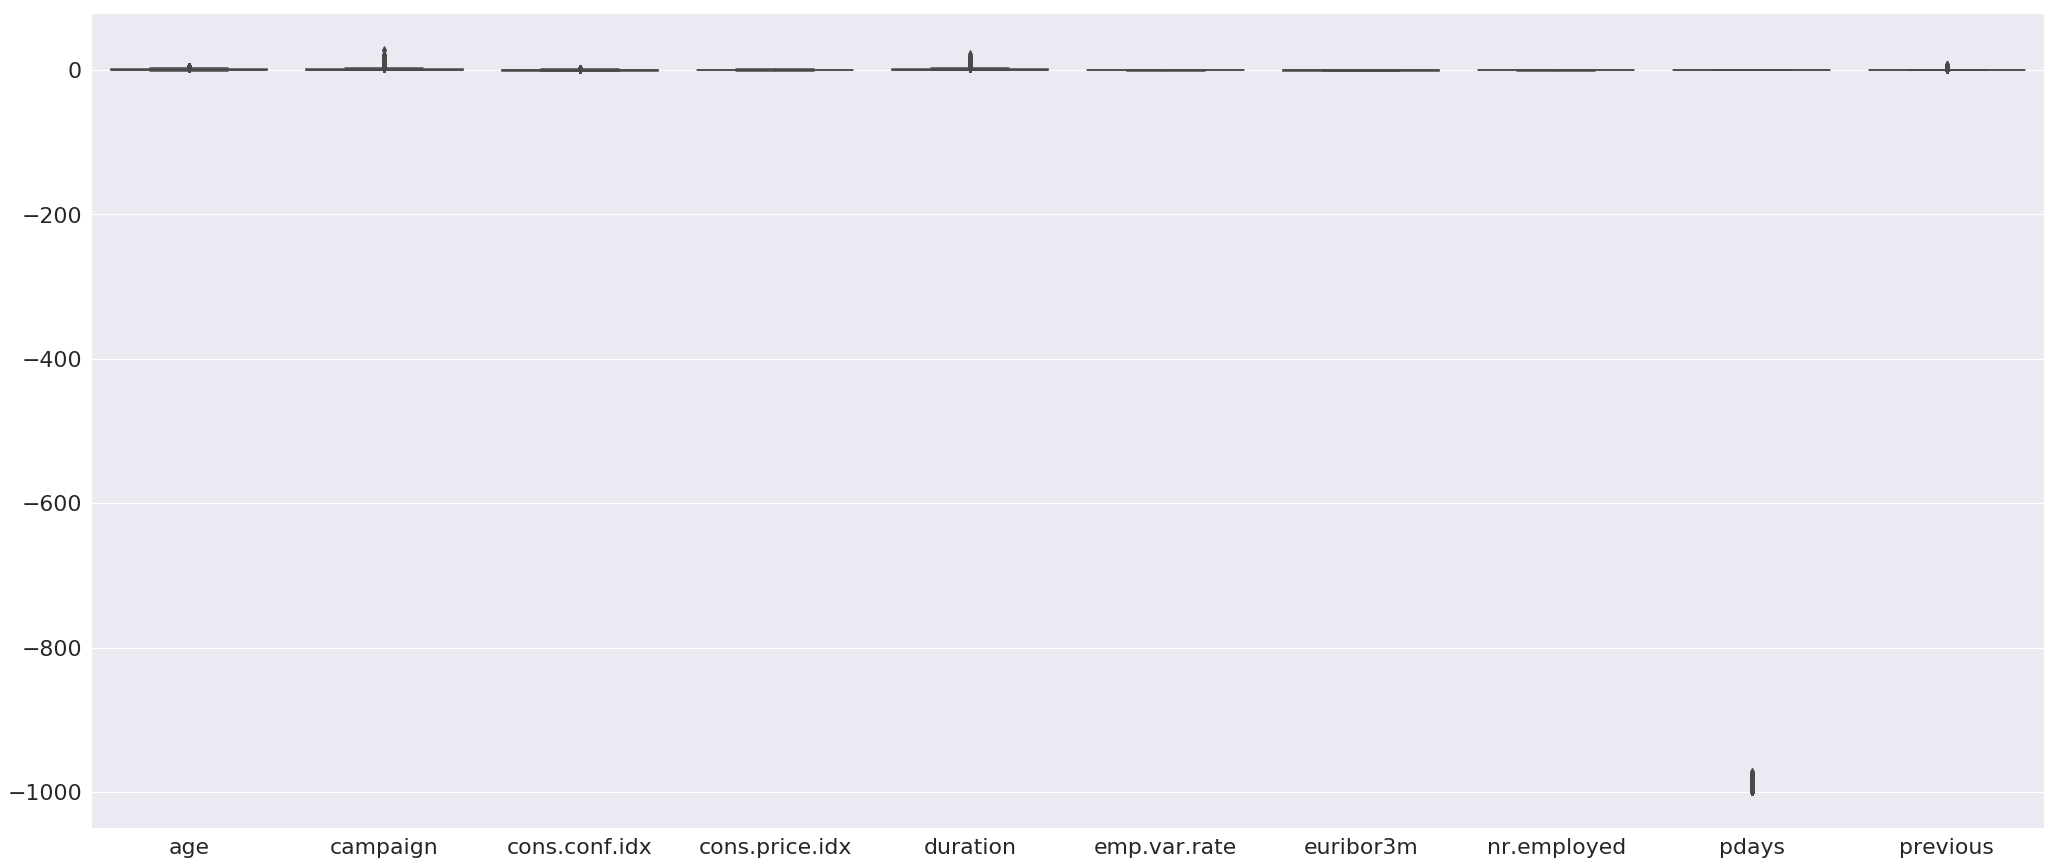

In [159]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_robust_scaled)
plt.show()

## sklearn.preprocessing.StandardScaler

In [106]:
standard_scaler = StandardScaler()

In [107]:
numericals_with_mean_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_mean_imputed),
    columns=numerical_features
)

In [119]:
numericals_with_mean_imputed_standard_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-4.670764e-16,2.342123e-15,1.960667e-14,1.930037e-13,-7.869684e-17,1.682833e-13,-4.623803e-14,-9.996551e-14,-4.648486e-14,-1.397767e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.400044e+00,-6.234332e-01,-2.548669e+00,-2.416533e+00,-1.024779e+00,-2.256522e+00,-1.861328e+00,-3.006159e+00,-5.285317e+00,-3.694670e-01
25%,-7.324198e-01,-6.234332e-01,-5.459695e-01,-8.801964e-01,-6.001333e-01,-1.220340e+00,-1.381451e+00,-1.002111e+00,2.012102e-01,-3.694670e-01
50%,0.000000e+00,-2.250357e-01,0.000000e+00,-2.498016e-14,-2.627979e-01,6.577387e-01,7.658584e-01,3.570918e-01,2.012102e-01,-3.694670e-01
75%,5.182987e-01,1.733618e-01,1.011686e+00,7.352422e-01,1.856598e-01,8.520227e-01,8.312113e-01,9.058016e-01,2.012102e-01,-3.694670e-01
max,6.042305e+00,2.128843e+01,3.360531e+00,2.094039e+00,1.849305e+01,8.520227e-01,8.841160e-01,9.058016e-01,2.012102e-01,1.464201e+01


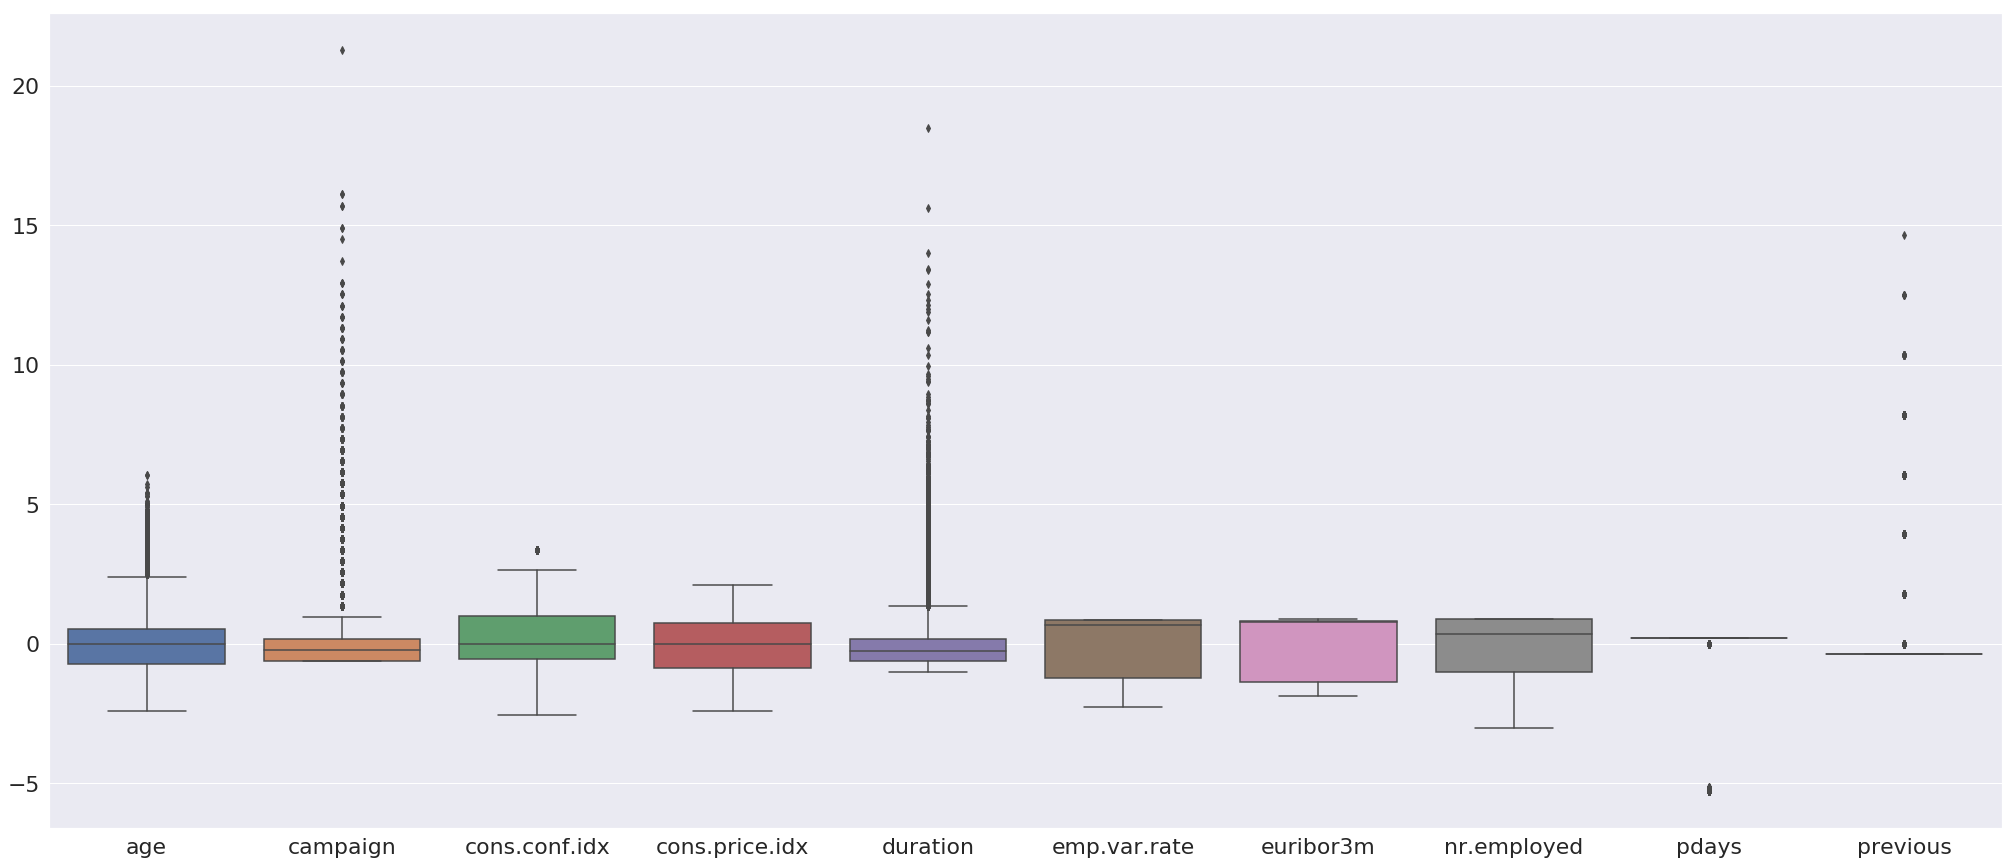

In [160]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_mean_imputed_standard_scaled)
plt.show()

In [108]:
numericals_with_median_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_median_imputed),
    columns=numerical_features
)

In [120]:
numericals_with_median_imputed_standard_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,9.261958e-16,9.466755e-16,5.997378e-14,-1.704735e-13,1.946287e-17,5.870668e-14,-6.464238e-14,-1.082419e-13,-9.845592e-14,1.385410e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.361209e+00,-5.816499e-01,-2.446479e+00,-2.423004e+00,-1.003237e+00,-2.262760e+00,-1.902594e+00,-3.030068e+00,-5.290688e+00,-3.272163e-01
25%,-6.983548e-01,-5.816499e-01,-4.627987e-01,-8.889377e-01,-5.797500e-01,-1.233756e+00,-1.438891e+00,-1.039995e+00,1.901987e-01,-3.272163e-01
50%,-1.787130e-01,-1.847086e-01,-2.423897e-01,2.940837e-01,-2.908292e-01,6.313135e-01,6.372446e-01,3.097297e-01,1.901987e-01,-3.272163e-01
75%,5.487856e-01,2.122327e-01,1.080064e+00,7.241138e-01,2.038982e-01,8.242518e-01,6.991919e-01,8.546132e-01,1.901987e-01,-3.272163e-01
max,6.056989e+00,2.125012e+01,3.406603e+00,2.080902e+00,1.846132e+01,8.242518e-01,7.503135e-01,8.546132e-01,1.901987e-01,1.458611e+01


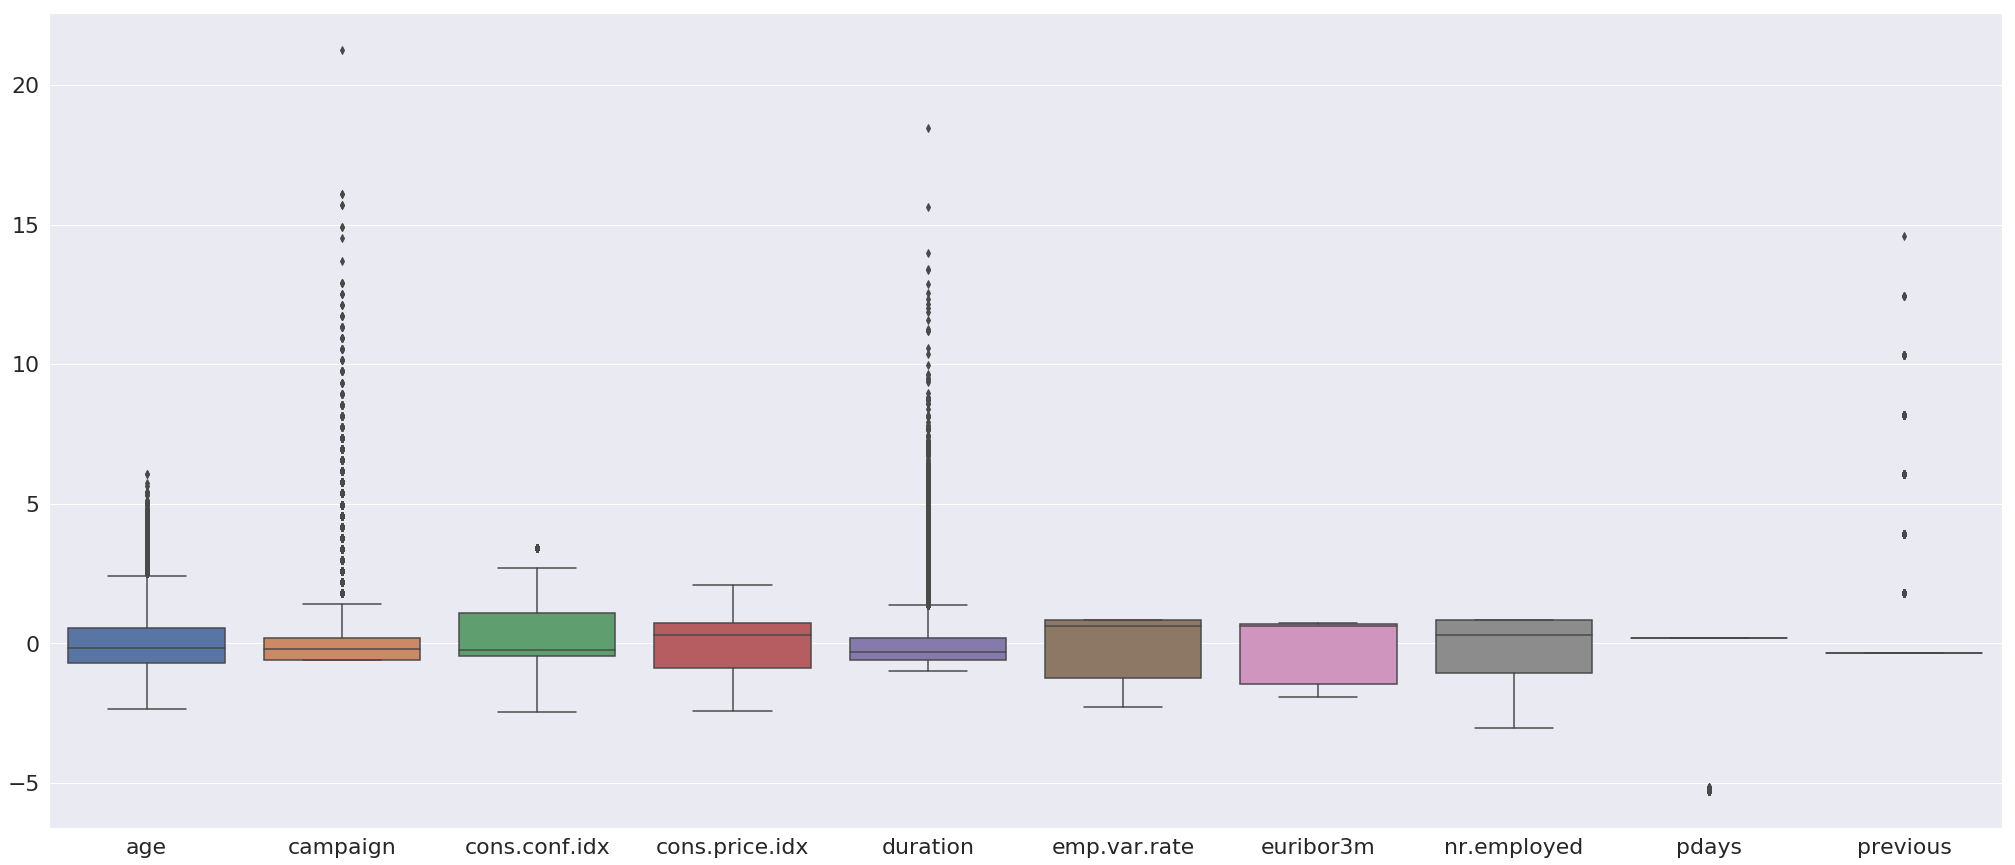

In [161]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_median_imputed_standard_scaled)
plt.show()

In [109]:
numericals_with_most_frequent_imputed_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(numericals_with_most_frequent_imputed),
    columns=numerical_features
)

In [121]:
numericals_with_most_frequent_imputed_standard_scaled.describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-7.111056e-16,-2.249772e-14,3.444290e-15,-1.401646e-14,-8.154733e-18,1.779799e-13,-6.464238e-14,-2.019405e-13,-9.845592e-14,1.385410e-13
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.138711e+00,-4.996877e-01,-2.563732e+00,-2.420015e+00,-9.701989e-01,-2.258673e+00,-1.902594e+00,-2.988225e+00,-5.290688e+00,-3.272163e-01
25%,-7.561819e-01,-4.996877e-01,-7.266994e-01,-8.967675e-01,-6.216429e-01,-1.234451e+00,-1.438891e+00,-1.069299e+00,1.901987e-01,-3.272163e-01
50%,-2.624214e-01,-4.996877e-01,7.021038e-01,5.724514e-01,-3.122505e-01,6.219496e-01,6.372446e-01,3.001478e-01,1.901987e-01,-3.272163e-01
75%,6.263474e-01,2.755402e-01,7.021038e-01,7.049076e-01,2.242908e-01,8.139911e-01,6.991919e-01,7.575744e-01,1.901987e-01,-3.272163e-01
max,5.860208e+00,2.081908e+01,2.856648e+00,2.052127e+00,1.829046e+01,8.139911e-01,7.503135e-01,7.575744e-01,1.901987e-01,1.458611e+01


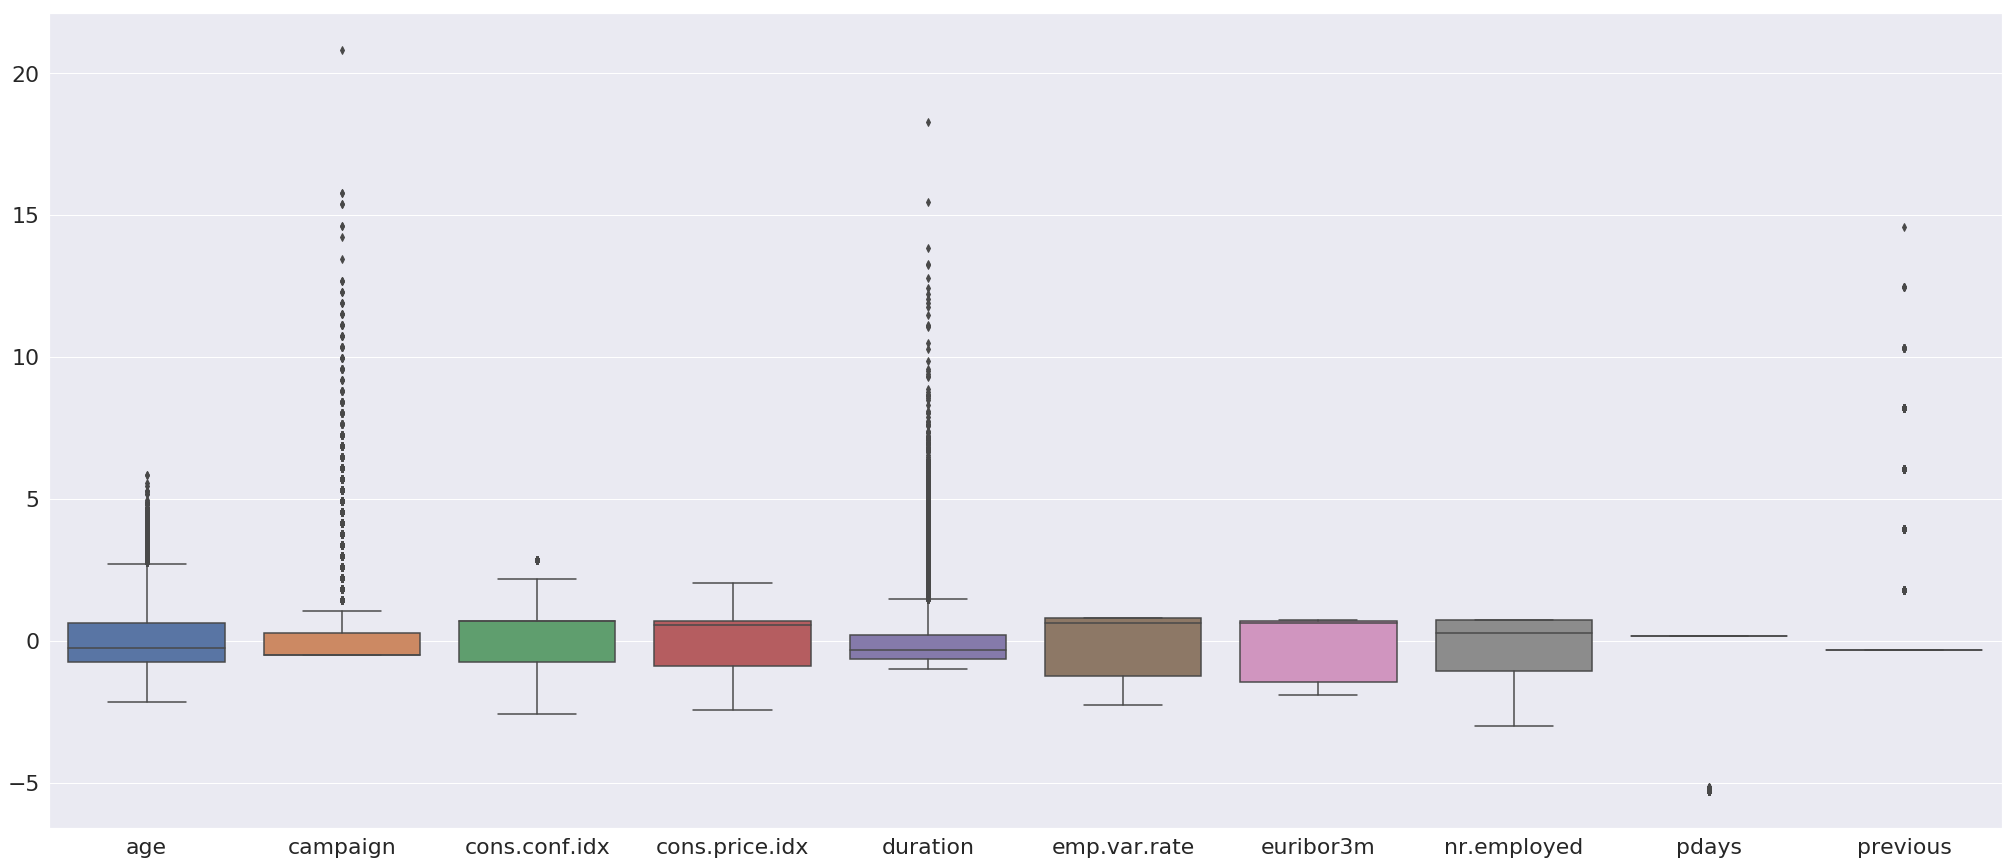

In [162]:
plt.figure(figsize=(35, 15))
sns.boxplot(data=numericals_with_most_frequent_imputed_standard_scaled)
plt.show()

# Transformers

# Encoders

# Outliers

# Target balancers

# Conclusion